In [1]:
import numpy as np
import pandas as pd
import scipy.stats as ss
from typing import Callable
import pandas as pd

In [2]:
df = pd.read_csv('train.csv')
df.head()

,target,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13
0,1,0.00,3.51,0.04,0.0,2.39,203.0,7.95,23.71,124.00,143,148,1,2
1,0,0.27,8.18,3.27,6.0,4.17,108.0,10.24,14.84,83.42,135,203,1,1
2,0,0.34,5.32,0.07,2.0,4.06,77.0,24.20,15.80,66.29,115,35,3,2
3,1,NaN,2.77,2.20,7.0,3.34,134.0,7.23,9.56,92.35,169,181,3,3
4,0,0.62,3.97,2.92,7.0,5.30,25.0,17.80,11.71,33.09,168,51,2,2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   target     1000 non-null   int64  
 1   feature1   981 non-null    float64
 2   feature2   1000 non-null   float64
 3   feature3   982 non-null    float64
 4   feature4   978 non-null    float64
 5   feature5   983 non-null    float64
 6   feature6   893 non-null    float64
 7   feature7   1000 non-null   float64
 8   feature8   1000 non-null   float64
 9   feature9   1000 non-null   float64
 10  feature10  1000 non-null   int64  
 11  feature11  1000 non-null   int64  
 12  feature12  1000 non-null   int64  
 13  feature13  1000 non-null   int64  
dtypes: float64(9), int64(5)
memory usage: 109.5 KB


In [4]:
dumbf = df

In [5]:
dumbf = dumbf.fillna(dumbf.mean())
dumbf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   target     1000 non-null   int64  
 1   feature1   1000 non-null   float64
 2   feature2   1000 non-null   float64
 3   feature3   1000 non-null   float64
 4   feature4   1000 non-null   float64
 5   feature5   1000 non-null   float64
 6   feature6   1000 non-null   float64
 7   feature7   1000 non-null   float64
 8   feature8   1000 non-null   float64
 9   feature9   1000 non-null   float64
 10  feature10  1000 non-null   int64  
 11  feature11  1000 non-null   int64  
 12  feature12  1000 non-null   int64  
 13  feature13  1000 non-null   int64  
dtypes: float64(9), int64(5)
memory usage: 109.5 KB


In [6]:
y, X = dumbf['target'], dumbf[dumbf.columns[1:]]
y, X

(0      1
 1      0
 2      0
 3      1
 4      0
       ..
 995    0
 996    0
 997    0
 998    1
 999    0
 Name: target, Length: 1000, dtype: int64,
      feature1  feature2  feature3  feature4  feature5  feature6  feature7  \
 0    0.000000      3.51      0.04       0.0      2.39     203.0      7.95   
 1    0.270000      8.18      3.27       6.0      4.17     108.0     10.24   
 2    0.340000      5.32      0.07       2.0      4.06      77.0     24.20   
 3    0.495341      2.77      2.20       7.0      3.34     134.0      7.23   
 4    0.620000      3.97      2.92       7.0      5.30      25.0     17.80   
 ..        ...       ...       ...       ...       ...       ...       ...   
 995  0.620000      5.20      4.67       7.0      5.92     107.0      8.74   
 996  0.890000      2.51      0.78       3.0      6.66      32.0      5.08   
 997  0.930000      4.60      1.97       2.0      7.12      86.0     11.29   
 998  0.630000      2.69      0.30       3.0      5.35     120.0   

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
instinct = LinearRegression().fit(X, y)

In [9]:
instinct.score(X, y)

0.22896084236959158

In [10]:
count = sum((instinct.predict(X) >= 0.5).astype(int) == y)
count / 1000

0.738

In [11]:
from sklearn.linear_model import Ridge, Lasso

In [12]:
rscores, lscores = [], []
for n in range(1000):
    ridge = Ridge(alpha=10.0 * (n + 1) / 1000, fit_intercept=False)
    ridge.fit(X, y)
    lasso = Lasso(alpha=10.0 * (n + 1) / 1000, fit_intercept=False)
    lasso.fit(X, y)
    rscores.append(ridge.score(X, y))
    lscores.append(lasso.score(X, y))

In [13]:
np.max(rscores), np.max(lscores)

(0.18391314253581248, 0.14698543444732992)

In [14]:
def acc(model, X, y):
    return sum((model.predict(X) >= 0.5).astype(int) == y) / X.shape[0]

acc(instinct, X, y)

0.738

In [15]:
class average_model:
    def __init__(self, models):
        self.models = models
    def fit(self, X, y):
        for model in self.models:
            model.fit(X, y)
    def predict(self, X):
        return sum([model.predict(X) for model in self.models]) / len(self.models)

In [16]:
class weighted_model:
    def __init__(self, models, weights):
        self.models = models
        self.weights = np.array(weights) / sum(weights)
    def fit(self, X, y):
        for model in self.models:
            model.fit(X, y)
    def predict(self, X):
        return sum([model.predict(X) * self.weights[i] for i, model in enumerate(self.models)]) / len(self.models)

In [17]:

acheck = average_model([LinearRegression()])
acheck.fit(X, y)
acc(acheck, X, y)

0.738

In [18]:
ridge = Ridge(alpha=0.01, fit_intercept=False)
lasso = Lasso(alpha=0.01, fit_intercept=False)
ridge.fit(X, y)
lasso.fit(X, y)
acc(ridge, X, y), acc(lasso, X, y)

(0.692, 0.665)

In [19]:
averagem = average_model([LinearRegression(), Ridge(alpha=0.01, fit_intercept=False),
                  Lasso(alpha=0.01, fit_intercept=False)])
averagem.fit(X, y)
acc(averagem, X, y)

0.704

In [20]:
weightm = weighted_model([LinearRegression(), Ridge(alpha=0.01, fit_intercept=False),
                  Lasso(alpha=0.01, fit_intercept=False)], [0.735, 0.689, 0.662])
weightm.fit(X, y)
acc(weightm, X, y)

0.549

In [21]:
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt

IndexError: list index out of range

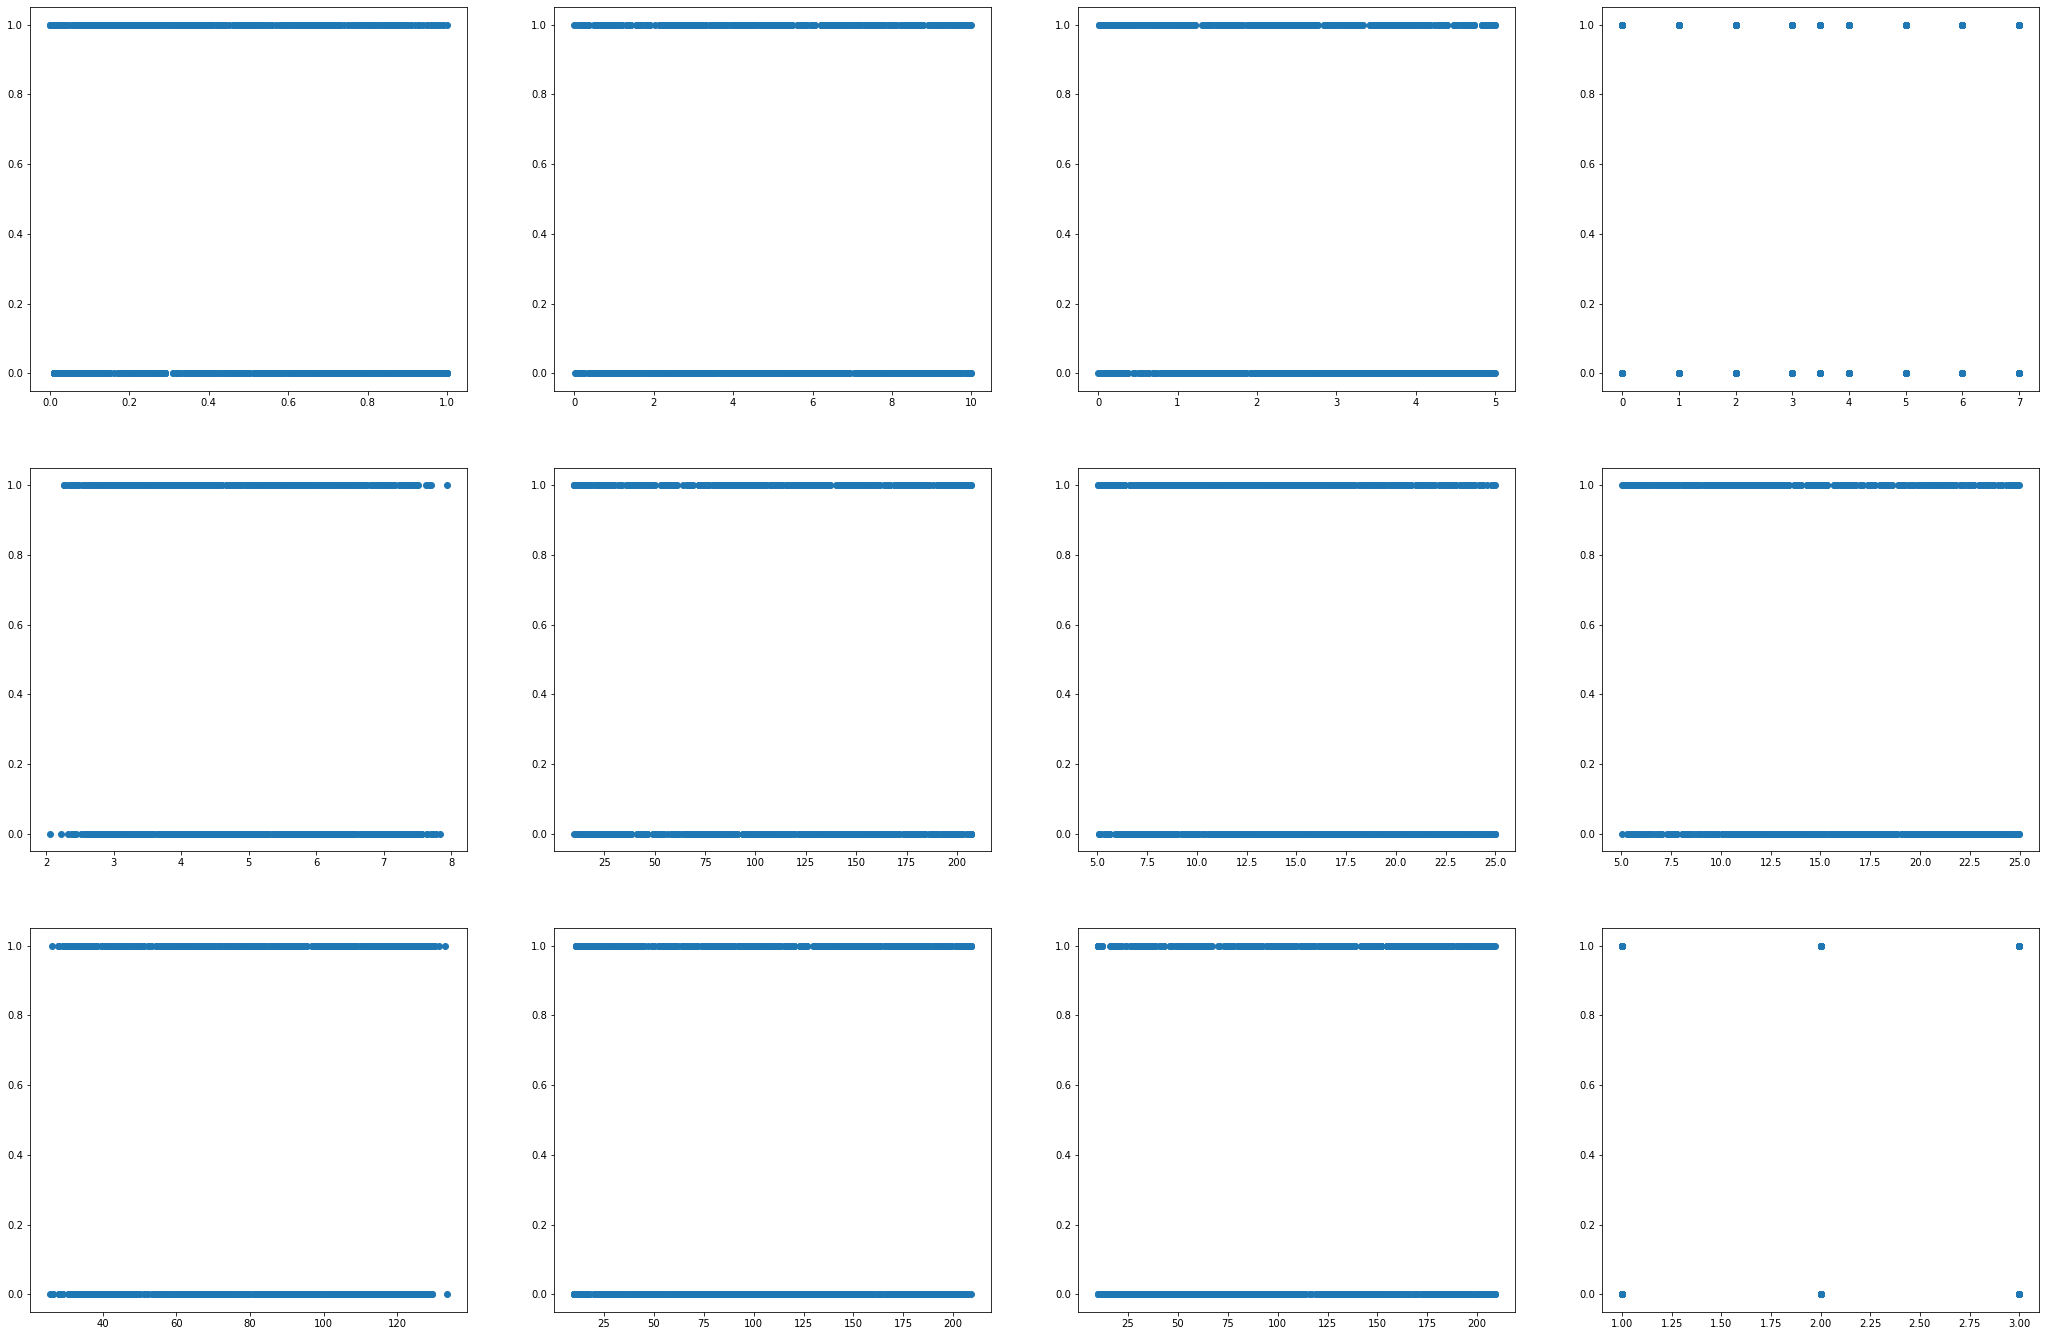

In [22]:
fig, gs = plt.figure(figsize=(36, 24)), GridSpec(3, 4)

ax = []
for i in range(12):
    ax.append(fig.add_subplot(gs[i]))

ind = 0
for name in X.columns:
    ax[ind].scatter(X[name], y)
    ind += 1
plt.show()

In [23]:
X_test = pd.read_csv('test.csv')
X_test.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,Id
0,0.42,8.27,0.35,1.0,4.57,22.0,20.74,5.25,39.23,25,39,2,1,0
1,0.65,4.13,2.84,6.0,5.71,149.0,15.86,9.32,102.48,84,150,2,1,1
2,0.44,1.95,1.08,3.0,4.78,95.0,14.55,19.81,74.24,206,64,1,2,2
3,0.71,1.31,2.51,7.0,5.58,158.0,23.06,8.44,103.27,209,162,2,2,3
4,0.38,5.66,3.85,NaN,4.73,91.0,13.90,7.74,66.64,124,44,2,3,4


In [24]:
acc(instinct, X, y)

0.738

In [25]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature1   976 non-null    float64
 1   feature2   1000 non-null   float64
 2   feature3   978 non-null    float64
 3   feature4   982 non-null    float64
 4   feature5   967 non-null    float64
 5   feature6   907 non-null    float64
 6   feature7   1000 non-null   float64
 7   feature8   1000 non-null   float64
 8   feature9   1000 non-null   float64
 9   feature10  1000 non-null   int64  
 10  feature11  1000 non-null   int64  
 11  feature12  1000 non-null   int64  
 12  feature13  1000 non-null   int64  
 13  Id         1000 non-null   int64  
dtypes: float64(9), int64(5)
memory usage: 109.5 KB


In [26]:
X_test = X_test.fillna(X_test.mean())

In [29]:
idd = X_test['Id']
del X_test['Id']

In [33]:
y = instinct.predict(X_test)
y = (y >= 0.5).astype(int)
y

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,

In [35]:
ans = pd.DataFrame(data={'target': y, 'Id': idd})
ans.head()

,target,Id
0,1,0
1,0,1
2,0,2
3,0,3
4,1,4


In [36]:
check = pd.read_csv('sample.csv')
check.head()

,target,Id
0,0,0
1,0,1
2,0,2
3,0,3
4,0,4


In [37]:
compression_opts = dict(method='zip',
                        archive_name='out.csv')  
ans.to_csv('out.zip', index=False,
          compression=compression_opts)  